# Classification avec Knn 

###### IMPORTATION DE PACKAGES 

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score,validation_curve

###### CHARGEMENT DES DONNEES 

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
target_name = "species"

data = df.drop(columns=[target_name], axis=1)
target = df.loc[ : ,target_name]

target.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

###### SPERATION DU JEU DE DONNEE 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size= 0.8, random_state=123)

###### MODEL DE BASE 

##### CHOIX DES HYPERPARAMETRES 

In [5]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# erreur de g
pred = model.predict(X_test)

model.score(X_test, y_test)

0.9666666666666667

- `cross_val_score` 

In [6]:
k_plage = np.arange(1, 40)
L_val = []

for i in k_plage:
    acc_val = cross_val_score(KNeighborsClassifier(n_neighbors= i ), X = X_train, y = y_train, cv= 4 ).mean()
    L_val.append(acc_val)
L_val = np.array(L_val)

Text(0, 0.5, 'accuracy validation ')

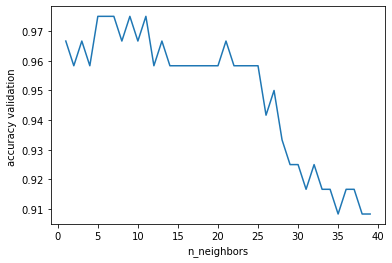

In [7]:
plt.plot(k_plage, L_val )
plt.xlabel("n_neighbors")
plt.ylabel("accuracy validation ")

In [8]:
L_val[np.argmax(L_val)]

0.9750000000000001

In [9]:
best_k = np.arange(1, 40)[np.argmax(L_val)]
best_k

7

In [10]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
model.score(X_test, y_test) 

0.9333333333333333

- Avec `validation_curve`

In [11]:
train_acc , val_acc = validation_curve(KNeighborsClassifier(), X = X_train, y=y_train,
                 param_name="n_neighbors", param_range=np.arange(1, 40), cv= 4)



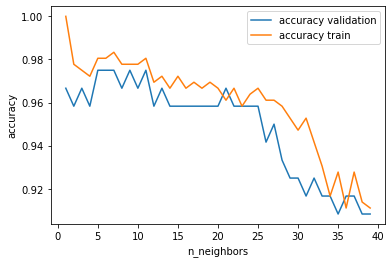

In [12]:
plt.figure()
plt.plot(np.arange(1, 40), val_acc.mean(axis=1), label = "accuracy validation")
plt.plot(np.arange(1, 40), train_acc.mean(axis=1), label = "accuracy train")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()

- `GridSearchcv` : Autre méthode pour faire la faire une selection hyperparameétres de façon beaucoup générale 

In [27]:
param_grid = {
 'n_neighbors': np.arange(1,30),
 'p': np.arange(1, 40)
}


In [28]:
grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid, cv= 5)
_ = grid.fit(X_train, y_train)

In [32]:
model = grid.best_estimator_

In [35]:
model.score(X_test, y_test) 

0.9666666666666667